# Sterile interaction
#### This version is tested with Anaconda Python 3.7.3,  Numpy 1.16.2, Numba 0.43.1 and Matplotlib 3.0.3
#### There might be problem with lower version of numba

### loading the library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numba
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# Non interactive channel
### The codes and function are used from the non interative 
####  function with old extension is copied from 

In [2]:
#=================================== Energy and cross section data:

# Unit is GeV and Km

x = np.loadtxt("./ExperimentalData/XCC.dat").transpose()

# In this file:
    # 10**x[0] is energy
    # x[1] is charged current quasi-elastic neutrino interaction 
    # x[4] is charged current quasi-elastic anti-neutrino interaction 

energy_cross_section = 10**x[0]
quasi_elastic_nu_cross = x[1]
quasi_elastic_anu_cross = x[4]

cross_section = [quasi_elastic_nu_cross, energy_cross_section]
anu_cross_section = [quasi_elastic_anu_cross, energy_cross_section]


#================================ Reading flux and their associated energy:

[eflux_nu, flux_nu] = np.loadtxt("./ExperimentalData/flux_neutrio_muon_MiniBooNE.csv",delimiter=",").transpose()
[eflux_anu, flux_anu] = np.loadtxt("./ExperimentalData/flux_antineutrio_muon_MiniBooNE.csv",delimiter=",").transpose()

nu_flux = [flux_nu, eflux_nu]
anu_flux = [flux_anu, eflux_anu] 


#================================ Experimental data of MiniBoone:

nexp_nu_mini = np.array([138.214,74.732175,72.1753,33.96915,4.0178625,30.681875,1.753245,7.01298,16.94806])
error_nu_mini = np.array([42.3699,24.5454,26.5909,17.3133,21.733,18.2629625,20.381475,16.43667,19.285723])

nexp_anu_mini = np.array([31.8506,16.4367,6.42857,11.3961,14.245125,5.1136375,-0.438312,-6.136365,-2.33766])
error_anu_mini = np.array([14.02595,9.20454,8.766225,7.12258125,8.9488625,7.67046875,7.232145,5.9172075,6.42857])

bins_old = np.array([0.200,0.300,0.375,0.475,0.550,0.675,0.800,0.950,1.100,1.300])





In [3]:
def delta_dirac_old(a,b):
    if (a == b):
        return 1
    elif (a != b):
        return 0
    else:
        return np.nan

In [4]:
def neutrino_flux_old(energy,flux, eflux):
    """
    This function calculate the flux for a given energy
    
    flux ...
    eflux ...
    """
    for i in np.arange(len(flux)-1):
        if (energy >= eflux[i] and energy < eflux[i+1]):
            rho = flux[i]
            break
            
    if(energy < eflux[0]):
        rho = 0
    
    if ( energy > eflux[-1]):
        rho = 0

    return rho*1.0

In [5]:
def cross_section_ccqe_nu_old(energy ,cross_section, ecross_section):
    """
    ....
    """
    for i in np.arange(len(cross_section)-1):
        if (energy >= ecross_section[i] and energy < ecross_section[i+1]):
            cross = cross_section[i] + ((cross_section[i+1]-cross_section[i])/(ecross_section[i+1]-ecross_section[i])) \
            * (energy - ecross_section[i])
            break
            
    if(energy < ecross_section[0]):
        cross = 0
    
    if ( energy > ecross_section[-1]):
        cross = cross_section[-1]
    

    return cross*1.0
    

In [6]:
def Oscillation_Probability_4nu_old(alpha, beta, dm2, t14,t24, t34, baseline, energy):
    """
        Enter t14 t24 t34 in degrees
        
        for alpha and beta variable enter:
        0 for electorn neutrio
        1 for muon neutrio
        2 for tau neutrio
        3 for sterile neutrio

        baseline in meter and energy in MeV or baseline in kilometer and energy in GeV
    """  
    
    t14 = np.deg2rad(t14)
    t24 = np.deg2rad(t24)
    t34 = np.deg2rad(t34)
        
    c14 = np.cos(t14)
    s14 = np.sin(t14)

    c24 = np.cos(t24)
    s24 = np.sin(t24)

    c34 = np.cos(t34)
    s34 = np.sin(t34) 
    
    UT = [s14, c24*s24, s34 * c24**2, c34 *  c24**2]
    
    uta = UT[alpha]
    
    utb = UT[beta]
    
    P2 = uta *  utb * (delta_dirac_old(alpha, beta) - uta *  utb)
    
    return delta_dirac_old(alpha, beta) - 4 * (np.sin((1.27*dm2 * baseline)/energy)**2)* P2    

In [7]:
"""
RUN FOR Nf ONLY
DON'T TRY IT AT HOME
"""
def N_th_per_bin_nf_old(energies, theta14 , theta24, dm2,L, cross_section,flux, run_status = False):
    """
    Energies is a list with three memebers:
        Energies = [E_min, E_max, num]
        
    ROTATION ANGLES

        Theta24 is in degree
        Theta14 is setted to 90.0
        Theta34 is setted to 0.0

    
    flux is a list with 2 members:
        flux = [flux_nu, eflux_nu]
        OR
        flux = [flux_anu, eflux_anu]     
        
    cross_section is a list with two members
        cross_section = [quasi_elastic_nu_cross, energy_cross_section]
        
    sin2th2, dm2,L,E
    """
    if (run_status):
        dE = (energies[1]- energies[0])/energies[2]
        energy_array = np.linspace(energies[0], energies[1], energies[2])
        flux_array = []
        cross_section_array = []
        p = []
        for e in energy_array:
            flux_array.append(neutrino_flux_old(e,flux[0], flux[1]))
            cross_section_array.append(cross_section_ccqe_nu_old(e ,cross_section[0], cross_section[1]))
            p.append(1.0)

        p = np.array(p)
        cross_section_array = np.array(cross_section_array) 
        flux_array = np.array(flux_array)

        return sum(p*cross_section_array*flux_array)*dE

    else:
        pass

energies_old = [0.1, 1.5, 100]
theta24_old = 9.3
theta14_old = 13.2
dm2_old = 1.0
L_old = 0.5
flux_old = [flux_nu, eflux_nu]
cross_section_old = [quasi_elastic_nu_cross, energy_cross_section]

nf_MiniBoone = (114020.130254588)/N_th_per_bin_nf_old(energies_old, theta14_old, theta24_old, dm2_old,L_old, cross_section_old,flux_old,True)



In [8]:
def N_th_per_bin_old(energies, theta14 , theta24, dm2,L, cross_section,flux):
    """
    Energies is a list with three memebers:
        Energies = [E_min, E_max, num]
        
    ROTATION ANGLES

        Theta24 is in degree
        Theta14 is setted to 90.0
        Theta34 is setted to 0.0

    
    flux is a list with 2 members:
        flux = [flux_nu, eflux_nu]
        OR
        flux = [flux_anu, eflux_anu]     
        
    cross_section is a list with two members
        cross_section = [quasi_elastic_nu_cross, energy_cross_section]
        
    sin2th2, dm2,L,E
    """
    dE = (energies[1]- energies[0])/energies[2]
    energy_array = np.linspace(energies[0], energies[1], energies[2])
    flux_array = []
    cross_section_array = []
    p = []
    for e in energy_array:
        flux_array.append(neutrino_flux_old(e,flux[0], flux[1]))
        cross_section_array.append(cross_section_ccqe_nu_old(e ,cross_section[0], cross_section[1]))
        p.append(Oscillation_Probability_4nu_old(1, 0, dm2 , theta14 , theta24 , 0.0 , L, e))
    
    p = np.array(p)
    cross_section_array = np.array(cross_section_array) 
    flux_array = np.array(flux_array)
    
    return (p*cross_section_array*flux_array*dE).sum()



## 

In [9]:
theta24_old = 13.2
theta14_old = 9.3

In [10]:
n_th_old = []
for i in range(len(bins_old)-1):
    energies_old = [bins_old[i], bins_old[i+1], 100]
    n_th_old.append(nf_MiniBoone * N_th_per_bin_old(energies_old, theta14_old, theta24_old, dm2_old,L_old, cross_section_old,flux_old))
n_th_old = np.array(n_th_old)


In [11]:
n_th_old

array([ 8.14489202, 25.07039001, 46.45648381, 37.5080779 , 57.86821869,
       45.87915972, 40.56375233, 25.45746583, 20.19128409])

# Interactive Model
    
                       

### Reading the data files

## here units are in MeV , Meters

In [12]:
[eflux_nu, flux_nu] = np.loadtxt("./ExperimentalData/flux_neutrio_muon_MiniBooNE.csv",delimiter=",").transpose()
[eflux_anu, flux_anu] = np.loadtxt("./ExperimentalData/flux_antineutrio_muon_MiniBooNE.csv",delimiter=",").transpose()

eflux_nu = eflux_nu * 1000

eflux_anu = eflux_anu * 1000

nu_flux = [flux_nu, eflux_nu]
anu_flux = [flux_anu, eflux_anu]




bins = np.array([0.200,0.300,0.375,0.475,0.550,0.675,0.800,0.950,1.100,1.300])*1000

nexp_anu_mini = np.array([31.8506,16.4367,6.42857,11.3961,14.245125,5.1136375,-0.438312,-6.136365,-2.33766])*1000
error_anu_mini = np.array([14.02595,9.20454,8.766225,7.12258125,8.9488625,7.67046875,7.232145,5.9172075,6.42857])*1000


nexp_nu_mini = np.array([138.214,74.732175,72.1753,33.96915,4.0178625,30.681875,1.753245,7.01298,16.94806])*1000
error_nu_mini = np.array([42.3699,24.5454,26.5909,17.3133,21.733,18.2629625,20.381475,16.43667,19.285723])*1000



### New nf

In [13]:
G_f = 1
V_ud = 0.97427
g_a = 1.2695
E_nu = 100 #Mev

sigma = ((G_f**2 * V_ud**2 )/(np.pi))*(1+3*g_a**2)*E_nu**2
sigma

17629.561729846668

In [14]:
#CHECK IT WOULD YOU PLEASE CHECK IT
nf1 =  0.7743708013248154  / sigma
nf1

4.39245633664173e-05

In [15]:
nf_MiniBoone = (114020.130254588)/ 3.167393711668175
nf_MiniBoone 

35998.09200686229

In [16]:
nf_intrative_sterile = 4.39245633664173e-05 * 35998.09200686229
nf_intrative_sterile

1.5812004734255427

In [17]:
dEe = 0.1
dEnu = 0.1
Ee_min = 200
Ee_max = 400
Enu_max = 3000
M_Z = 10 # MeV  1 - 1000 MeV
g_prime = 1.0 # 0.1 - 50


theta24 = 9.8
dm2 = 1.0
L = 500


## Functions

### remember to run each function after definition with minimum inputs to compile

In [18]:
@numba.njit()
def delta_dirac(a,b):
    if (a == b):
        return 1
    elif (a != b):
        return 0
    else:
        return np.nan

$C^{\rm V}_\alpha = -\frac{1}{2}+2s^2_{\rm W} + \delta_{\alpha e} + \frac{Q^{\rm V}_{e} Q^{\rm L}_{\alpha} }{2\sqrt{2}G_F} \frac{(g^\prime)^2}{M_{Z^\prime}^2+2m_eT_e}$

$C^{\rm A}_\alpha = -\frac{1}{2} + \delta_{\alpha e} + \frac{Q^{\rm A}_{e} Q^{\rm L}_{\alpha} }{2\sqrt{2} G_F} \frac{(g^\prime)^2}{ M_{Z^\prime}^2 + 2m_e T_e}$

$C^{\rm V}_\alpha = -\frac{1}{2}+2s^2_{\rm W} + \delta_{\alpha e} + \frac{1 }{\sqrt{2}G_F} \frac{g^\prime \, e\, \varepsilon(q^2)}{M_{Z^\prime}^2+2m_eT_e}$

$ \frac{d\sigma_{\nu_{\alpha}-e}}{dT_e} = \frac{2m_eG_F^2}{\pi} \left[ \left(C^{\rm L}_\alpha\right)^2 +\left(C^{\rm R}_\alpha\right)^2\left(1-\frac{T_e}{E_\nu}\right)^2-C^{\rm L}_\alpha C^{\rm R}_\alpha \, m_e \frac{T_e}{E_\nu^2} \right]$

$C^{\rm L}_\alpha \equiv \frac{1}{2}\left(C^{\rm V}_\alpha + C^{\rm A}_\alpha\right) \qquad\text{and}\qquad
C^{\rm R}_\alpha \equiv \frac{1}{2}\left(C^{\rm V}_\alpha - C^{\rm A}_\alpha\right)$

For antineutrino scattering one obtains the cross section by exchanging $C_{\alpha}^{\rm L} \leftrightarrow C_{\alpha}^{\rm R}$. 


In [19]:
@numba.njit()
def DS_over_DE(nu_or_anu ,E_nu, T_e, M_Z, g_prime):
    """
    for anti neutrino enter "anu"
    Both Enu and T_e are in MeV
    """
    m_e = 0.511   #MeV
    G_F = 1
    pi = 1.0
    
    Q_e_V = 1.0
    Q_alpha_L = 1.0
    Q_e_A = 1.0
    
    C_alpha_V =  ((Q_e_V * Q_alpha_L)/(2*np.sqrt(2)*G_F)) * ((g_prime**2)/(M_Z**2 + 2*m_e*T_e))
    C_alpha_A =  ((Q_e_A * Q_alpha_L)/(2*np.sqrt(2)*G_F)) * ((g_prime**2)/(M_Z**2 + 2*m_e*T_e))
    
    
    C_alpha_L = 0.5*(C_alpha_V + C_alpha_A)
    C_alpha_R = 0.5*(C_alpha_V - C_alpha_A)
    
    if (nu_or_anu == "anu"):
        C_alpha_R, C_alpha_L = C_alpha_L, C_alpha_R
        
    
    
    return  (2 * m_e * G_F**2 / pi) * ( C_alpha_L**2 + (C_alpha_R**2)*(1-T_e/E_nu)**2  - C_alpha_L * C_alpha_R * m_e * (T_e / E_nu**2))
     
    


In [20]:
#%%timeit 
DS_over_DE("anu" , 1000, 100 , M_Z, g_prime)

2.5309503473659186e-06

In [21]:
#============================== flux
@numba.njit()
def neutrino_flux(energy,flux, eflux):
    """
    This function calculate the flux for a given energy
    
    flux ...
    eflux ...
    """
    for i in np.arange(len(flux)-1):
        if (energy >= eflux[i] and energy < eflux[i+1]):
            rho = flux[i]
            break
            
    if(energy < eflux[0]):
        rho = 0
    
    if ( energy > eflux[-1]):
        rho = 0
    
    return rho*1.0
    

In [22]:
neutrino_flux(1200,flux_nu, eflux_nu)

2.580800731852957

In [23]:
@numba.njit(parallel=True, fastmath = True)
def Oscillation_Probability_4nu(alpha, beta, dm2, t14,t24, t34, baseline, energy):
    """
        Enter t14 t24 t34 in degrees
        
        for alpha and beta variable enter:
        0 for electorn neutrio
        1 for muon neutrio
        2 for tau neutrio
        3 for sterile neutrio

        baseline in meter and energy in MeV or baseline in kilometer and energy in GeV
    """  
        
   # t13 = np.deg2rad(9.0)
   # t23 = np.deg2rad(45.0)
   # t12 = np.deg2rad(33.0)
    
    t14 = np.deg2rad(t14)
    t24 = np.deg2rad(t24)
    t34 = np.deg2rad(t34)
    
   # c23 = np.cos(t23)
   # s23 = np.sin(t23)

   # c13 = np.cos(t13)
   # s13 = np.sin(t13)

   # c12 = np.cos(t12)
   # s12 = np.sin(t12)
    
    c14 = np.cos(t14)
    s14 = np.sin(t14)

    c24 = np.cos(t24)
    s24 = np.sin(t24)

    c34 = np.cos(t34)
    s34 = np.sin(t34)
    
    
      
    
    UT = [s14, c24*s24, s34 * c24**2, c34 *  c24**2]
    
    uta = UT[alpha]
    
    utb = UT[beta]
    
    P2 = uta *  utb * (delta_dirac(alpha, beta) - uta *  utb)
    
    return delta_dirac(alpha, beta) - 4 * (np.sin((1.27*dm2 * baseline)/energy)**2)* P2
    
    

In [24]:
@numba.njit(parallel = True, fastmath = True)
def N_th_per_bin_2(energies_e, nu_or_anu ,M_Z, g_prime,theta24, L,dm2, flux_nu, eflux_nu):
    """
    Energies is a list with three memebers:
        Energies = [E_min, E_max, num]
        
    Flux
        nu_flux = [flux_nu, eflux_nu]
        or
        anu_flux = [flux_anu, eflux_anu]

  
    """
    Ee_min = energies_e[0]
    Ee_max = energies_e[1]
    
    
    dEe = 10 #(Ee_max - Ee_min)/energies_e[2]
    dEnu = dEe
    Enu_max = 3000 

    sum_value = 0.0
    for T_e in np.arange(Ee_min,Ee_max,dEe):
        for E_nu in np.arange(T_e,Enu_max,dEnu):
            sum_value  +=  Oscillation_Probability_4nu(1, 3, dm2, 90.0, theta24 , 0.0 ,L , E_nu) * DS_over_DE("nu", E_nu, T_e, M_Z, g_prime)*neutrino_flux(E_nu,flux_nu, eflux_nu)

    
    return sum_value * dEe * dEnu

In [25]:
N_th_per_bin_2([200,700,5], "nu" ,M_Z, g_prime,theta24, L,dm2, flux_nu, eflux_nu)

0.05948337257710047

In [26]:
@numba.njit(parallel = True, fastmath = True)
def chi2(n_th_old, bins, n_exp, error,nu_or_anu, M_Z, g_prime,theta24, L,dm2, flux_nu, eflux_nu):
    '''
        NORMATIZATION FACTOR HAS TO BE IN THE INPUT
    '''
    
    n_th = []
    for i in range(len(bins)-1):
        energies_e = [bins[i], bins[i+1], 100]
        n_th.append(nf_intrative_sterile * N_th_per_bin_2(energies_e, nu_or_anu ,M_Z, g_prime,theta24, L,dm2, flux_nu, eflux_nu))

    n_th = np.array(n_th)
    n_th = n_th + n_th_old
    chi2_arr = ((n_th - n_exp)/error)*((n_th - n_exp)/error)
    chi2_val = 0.0
    for val in chi2_arr:
        chi2_val += val
        
    return chi2_val 
    

In [27]:
chi2(n_th_old, bins, nexp_nu_mini, error_nu_mini,"nu", M_Z, g_prime,theta24, L,dm2, flux_nu, eflux_nu)

34.9078910528081

## Changing the variable $\theta_{24}$, $M_{Z'}$, $g'$

### Changing $M_{Z'}$, $g'$
###  $\theta_{24} = 9.3$ 

In [34]:
dEe = 0.1
dEnu = 0.1
Ee_min = 200
Ee_max = 400
Enu_max = 3000
M_Z = 10 # MeV  1 - 1000 MeV
g_prime = 1.0 # 0.1 - 50
theta24 = 9.3
dm2 = 1.0
L = 500

num = 100
n_z = np.linspace(0,3,num)
n_g_prime = np.linspace(-1,1.7,num)
M_Z_array = 10**n_z
g_prime_array = 10**n_g_prime


parameter_mat = "MZ_Gprime"
nu_file_name = "./Output/interactive/nue_"+parameter_mat+"_"+str(num)+"_CHI2_MAT.dat"
anu_file_name = "./Output/interactive/anue_"+parameter_mat+"_"+str(num)+"_CHI2_MAT.dat"

In [35]:
#============= running for neutrino
f = open(nu_file_name,"w")
count = 1
for M_Z_i in M_Z_array:
    for g_prime_i in g_prime_array:
        chi2_value = chi2(n_th_old,bins, nexp_nu_mini, error_nu_mini,"nu",M_Z_i, g_prime_i,theta24, L,dm2, flux_nu, eflux_nu)
        f.write(str(chi2_value)+"\t")
        if (count == len(g_prime_array)):
            f.write("\n")
            count = 1
        else:
            count = count + 1
f.close()  

In [36]:
#============= running for anti-neutrino
f = open(anu_file_name,"w")
count = 1
for M_Z_i in M_Z_array:
    for g_prime_i in g_prime_array:
        chi2_value = chi2(n_th_old,bins, nexp_anu_mini, error_anu_mini,"anu",M_Z_i, g_prime_i,theta24, L,dm2, flux_anu, eflux_anu)
        f.write(str(chi2_value)+"\t")
        if (count == len(g_prime_array)):
            f.write("\n")
            count = 1
        else:
            count = count + 1
f.close()

In [37]:
CHI2_MAT_nu = np.loadtxt(nu_file_name)
CHI2_MAT_anu = np.loadtxt(anu_file_name)
chi_kol = CHI2_MAT_nu  + CHI2_MAT_anu

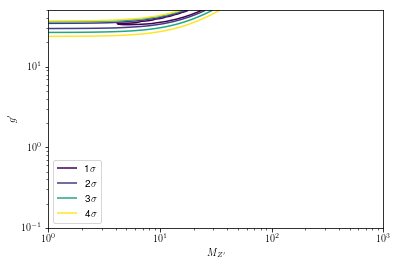

In [38]:
fig, ax = plt.subplots()

y , x = np.meshgrid(g_prime_array, M_Z_array)
CS = ax.contour(x, y ,chi_kol - chi_kol.min() ,levels =  [3.3,6.18,12.83,19.33]) 
#plt.clabel(CS, inline=1, fontsize=10)   # this is countor label
labels = ['1$\sigma$', '2$\sigma$','3$\sigma$','4$\sigma$']
for i in range(len(labels)):
    ax.collections[i].set_label(labels[i])
    
#ax.set_xticklabels([0, .1,.2,.3,.4,.5,.6,.7,.8,.9,.10])
#ax.scatter(x_min,y_min,marker="o",s=100,c="k")

plt.legend(loc=3);ax.set_yscale('log');ax.set_xscale('log')

#plt.legend(loc=0)



ax.set_xlabel("$M_{Z'}$")
ax.set_ylabel("$g'$")
plt.savefig("./Output/interactive/"+parameter_mat+"_"+str(num)+"_.pdf")

### Changing $\theta_{24}$, $g'$.
### $M_{Z'} = 1, 5, 10 , 20$ MeV

In [39]:
num = 100
    
dEe = 0.1
dEnu = 0.1
Ee_min = 200
Ee_max = 400
Enu_max = 3000
g_prime = 1.0 # 0.1 - 50
power = np.linspace(-4,0,num)
sin2_theta_24 = 10.0**power
dm2 = 1.0
L = 500

n_z = np.linspace(0,3,num)
n_g_prime = np.linspace(-1,1.7,num)
M_Z_array = 10**n_z
g_prime_array = 10**n_g_prime

pwd_str = os.getcwd()
parameter_mat = "theta24_Gprime"

MZ_list = [1, 5, 10, 20]
nu_file_name = []
anu_file_name = []

for MZ in MZ_list:
    nu_file_name.append(pwd_str+"/Output/interactive/nue_MZ_"+str(MZ)+"_"+parameter_mat+"_"+str(num)+"_CHI2_MAT.dat")
    anu_file_name.append(pwd_str+"/Output/interactive/anue_MZ_"+str(MZ)+"_"+parameter_mat+"_"+str(num)+"_CHI2_MAT.dat")
    

In [40]:
n_th_old = []
for i in range(len(bins)-1):
    energies_old = [bins_old[i], bins_old[i+1], 100]
    n_th_old.append(nf_MiniBoone * N_th_per_bin_old(energies_old, theta14_old, theta24_old, dm2_old,L_old, cross_section_old,flux_old))
n_th_old = np.array(n_th_old)


In [41]:
for M_Z_i in MZ_list:
    #============= running for neutrino
    f = open(nu_file_name[MZ_list.index(M_Z_i)],"w")
    count = 1
    for sin2theta24 in sin2_theta_24:
        theta24 = np.rad2deg(np.arcsin(np.sqrt(sin2theta24)))/2.0
        
        n_th_old = []
        for i in range(len(bins)-1):
            energies_old = [bins_old[i], bins_old[i+1], 100]
            n_th_old.append(nf_MiniBoone * N_th_per_bin_old(energies_old, theta14_old, theta24, dm2_old,L_old, cross_section_old,flux_old))
        n_th_old = np.array(n_th_old)

        
        for g_prime_i in g_prime_array:
            chi2_value = chi2(n_th_old,bins, nexp_nu_mini, error_nu_mini,"nu",M_Z_i, g_prime_i,theta24, L,dm2, flux_nu, eflux_nu)
            f.write(str(chi2_value)+"\t")
            if (count == len(g_prime_array)):
                f.write("\n")
                count = 1
            else:
                count = count + 1
    
    f.close()  

In [42]:
for M_Z_i in MZ_list:
    #============= running for anit-neutrino
    f = open(anu_file_name[MZ_list.index(M_Z_i)],"w")
    count = 1
    for sin2theta24 in sin2_theta_24:
        theta24 = np.rad2deg(np.arcsin(np.sqrt(sin2theta24)))/2.0

        n_th_old = []
        for i in range(len(bins)-1):
            energies_old = [bins_old[i], bins_old[i+1], 100]
            n_th_old.append(nf_MiniBoone * N_th_per_bin_old(energies_old, theta14_old, theta24, dm2_old,L_old, cross_section_old,flux_old))
        n_th_old = np.array(n_th_old)
        
        for g_prime_i in g_prime_array:
            chi2_value = chi2(n_th_old,bins, nexp_anu_mini, error_anu_mini,"anu",M_Z_i, g_prime_i,theta24, L,dm2, flux_anu, eflux_anu)
            f.write(str(chi2_value)+"\t")
            if (count == len(g_prime_array)):
                f.write("\n")
                count = 1
            else:
                count = count + 1

    f.close()  

In [43]:
chi_kol = []
for i in range(len(MZ_list)):
    CHI2_MAT_nu = np.loadtxt(nu_file_name[i])
    CHI2_MAT_anu = np.loadtxt(anu_file_name[i])
    chi_kol.append(CHI2_MAT_nu  + CHI2_MAT_anu)

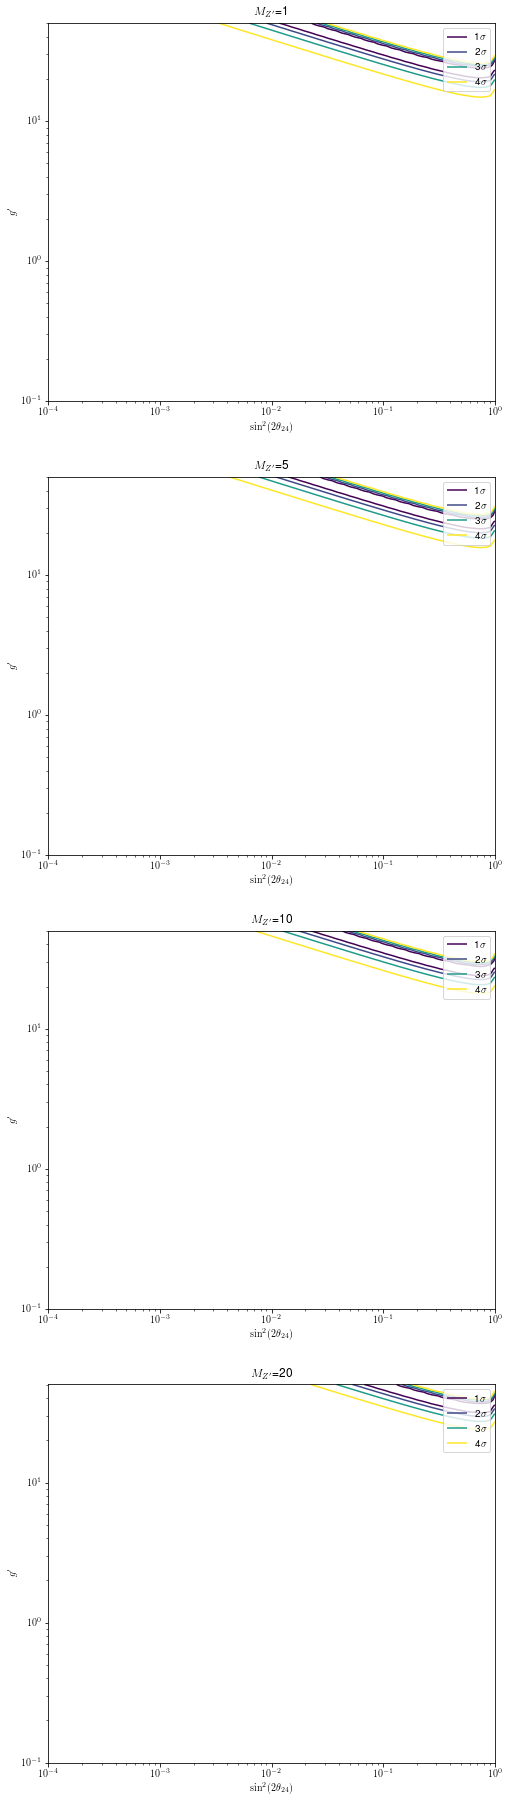

In [48]:
fig, ax = plt.subplots(len(MZ_list),1,figsize = (8,8*len(MZ_list)))
y , x = np.meshgrid(g_prime_array, sin2_theta_24)

for j in range(len(MZ_list)):
    CS = ax[j].contour(x, y ,chi_kol[j] - chi_kol[j].min() ,levels =  [3.3,7.18,12.73,20.49]) 
    #plt.clabel(CS, inline=1, fontsize=10)   # this is countor label
    labels = ['1$\sigma$', '2$\sigma$','3$\sigma$','4$\sigma$']
    for i in range(len(labels)):
        ax[j].collections[i].set_label(labels[i])

    #ax.set_xticklabels([0, .1,.2,.3,.4,.5,.6,.7,.8,.9,.10])
    #ax.scatter(x_min,y_min,marker="o",s=100,c="k")

    ax[j].legend(loc=0)

    ax[j].set_yscale('log')
    ax[j].set_xscale('log')
    ax[j].set_xlabel(r"$\sin^2(2\theta_{24})$")
    ax[j].set_ylabel("$g'$")
    
    ax[j].set_title("$M_{Z'}$="+str(MZ_list[j]))
    
plt.savefig("./Output/interactive/MZ_"+parameter_mat+"_"+str(num)+".pdf")

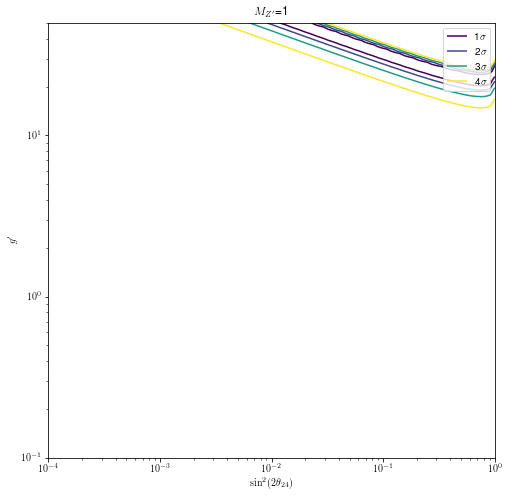

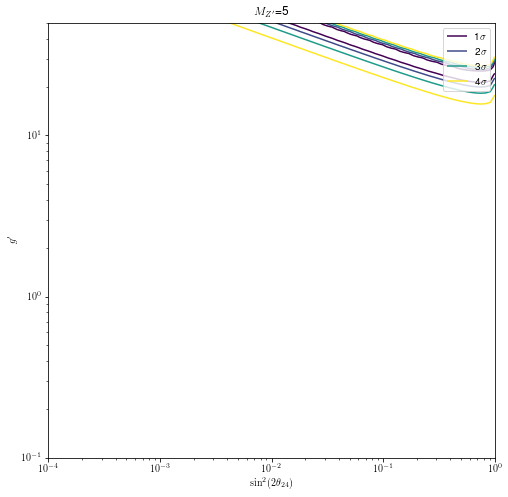

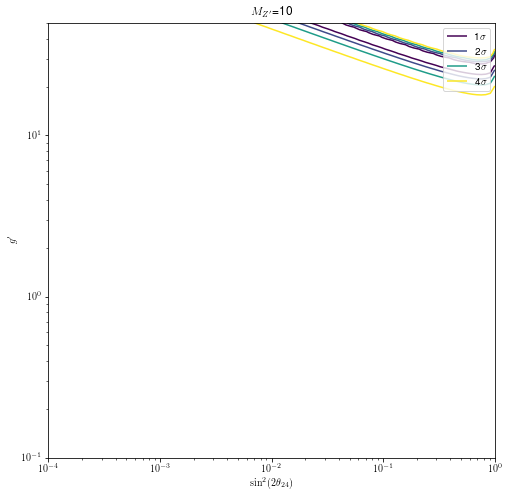

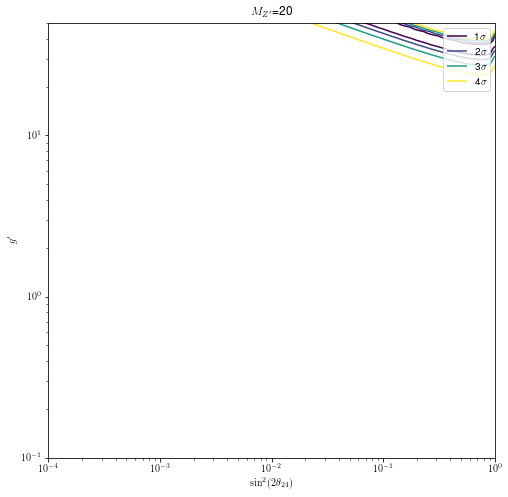

In [50]:
y , x = np.meshgrid(g_prime_array, sin2_theta_24)

for j in range(len(MZ_list)):
    fig, ax = plt.subplots(1,1,figsize = (8,8))
    CS = ax.contour(x, y ,chi_kol[j] - chi_kol[j].min() ,levels =  [3.3,7.18,12.73,20.49]) 
    #plt.clabel(CS, inline=1, fontsize=10)   # this is countor label
    labels = ['1$\sigma$', '2$\sigma$','3$\sigma$','4$\sigma$']
    for i in range(len(labels)):
        ax.collections[i].set_label(labels[i])

    #ax.set_xticklabels([0, .1,.2,.3,.4,.5,.6,.7,.8,.9,.10])
    #ax.scatter(x_min,y_min,marker="o",s=100,c="k")

    ax.legend(loc=0)

    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\sin^2(2{\theta}_{24})$")
    ax.set_ylabel("$g'$")
    
    ax.set_title("$M_{Z'}$="+str(MZ_list[j]))
    plt.savefig("./Output/interactive/MZ_"+str(MZ_list)+"_"+parameter_mat+"_"+str(num)+""+str(j)+".pdf")

### Changing $\theta_{24}$, $M_{Z'}$.
### $g' = 0.1, 1, 10, 50$


In [62]:
num = 100
    
dEe = 0.1
dEnu = 0.1
Ee_min = 200
Ee_max = 400
Enu_max = 3000
g_prime = 1.0 # 0.1 - 50
power = np.linspace(-4,0,num)
sin2_theta_24 = 10.0**power
dm2 = 1.0
L = 500

n_z = np.linspace(0,3,num)
M_Z_array = 10**n_z

pwd_str = os.getcwd()
parameter_mat = "theta24_MZ"

Gp_list = [10, 50]#, 10 , 50]
nu_file_name = []
anu_file_name = []

for Gp in Gp_list:
    nu_file_name.append(pwd_str+"/Output/interactive/nue_Gp_"+str(Gp)+"_"+parameter_mat+"_"+str(num)+"_CHI2_MAT.dat")
    anu_file_name.append(pwd_str+"/Output/interactive/anue_Gp_"+str(Gp)+"_"+parameter_mat+"_"+str(num)+"_CHI2_MAT.dat")
    


In [63]:
for Gp in Gp_list:
    #============= running for neutrino
    f = open(nu_file_name[Gp_list.index(Gp)],"w")
    count = 1
    for sin2theta24 in sin2_theta_24:
        theta24 = np.rad2deg(np.arcsin(np.sqrt(sin2theta24)))/2.0
        
        n_th_old = []
        for i in range(len(bins)-1):
            energies_old = [bins_old[i], bins_old[i+1], 100]
            n_th_old.append(nf_MiniBoone * N_th_per_bin_old(energies_old, theta14_old, theta24, dm2_old,L_old, cross_section_old,flux_old))
        n_th_old = np.array(n_th_old)

        for M_Z_i in M_Z_array:
            chi2_value = chi2(n_th_old,bins, nexp_nu_mini, error_nu_mini,"nu",M_Z_i, g_prime_i,theta24, L,dm2, flux_nu, eflux_nu)
            f.write(str(chi2_value)+"\t")
            if (count == len(g_prime_array)):
                f.write("\n")
                count = 1
            else:
                count = count + 1
    f.close()  

In [64]:
for Gp in Gp_list:
    #============= running for neutrino
    f = open(anu_file_name[Gp_list.index(Gp)],"w")
    count = 1
    for sin2theta24 in sin2_theta_24:
        theta24 = np.rad2deg(np.arcsin(np.sqrt(sin2theta24)))/2.0

        n_th_old = []
        for i in range(len(bins)-1):
            energies_old = [bins_old[i], bins_old[i+1], 100]
            n_th_old.append(nf_MiniBoone * N_th_per_bin_old(energies_old, theta14_old, theta24, dm2_old,L_old, cross_section_old,flux_old))
        n_th_old = np.array(n_th_old)

        for M_Z_i in M_Z_array:
            chi2_value = chi2(n_th_old,bins, nexp_anu_mini, error_anu_mini,"anu",M_Z_i, g_prime_i,theta24, L,dm2, flux_anu, eflux_anu)
            f.write(str(chi2_value)+"\t")
            if (count == len(g_prime_array)):
                f.write("\n")
                count = 1
            else:
                count = count + 1
    f.close() 

In [65]:
chi_kol = []
for i in range(len(Gp_list)):
    CHI2_MAT_nu = np.loadtxt(nu_file_name[i])
    CHI2_MAT_anu = np.loadtxt(anu_file_name[i])
    chi_kol.append(CHI2_MAT_nu  + CHI2_MAT_anu)

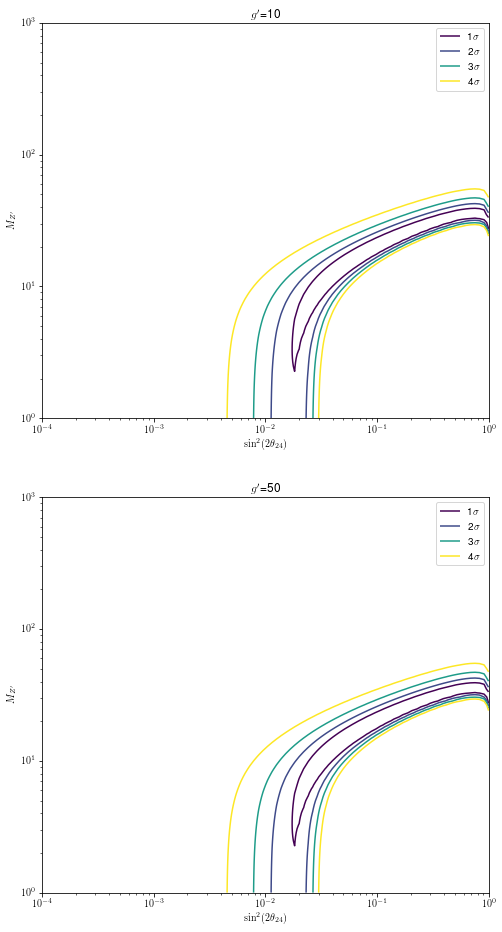

In [68]:
fig, ax = plt.subplots(len(Gp_list),1,figsize = (8,8*len(Gp_list)))
y , x = np.meshgrid(M_Z_array, sin2_theta_24)

for j in range(len(Gp_list)):
    CS = ax[j].contour(x, y ,chi_kol[j] - chi_kol[j].min() ,levels =  [3.3,7.18,12.73,20.49]) 
    #plt.clabel(CS, inline=1, fontsize=10)   # this is countor label
    labels = ['1$\sigma$', '2$\sigma$','3$\sigma$','4$\sigma$']
    for i in range(len(labels)):
        ax[j].collections[i].set_label(labels[i])

    #ax.set_xticklabels([0, .1,.2,.3,.4,.5,.6,.7,.8,.9,.10])
    #ax.scatter(x_min,y_min,marker="o",s=100,c="k")

    ax[j].legend(loc=0)

    ax[j].set_yscale('log')
    ax[j].set_xscale('log')
    ax[j].set_xlabel(r"$\sin^2(2\theta_{24})$")
    ax[j].set_ylabel("$M_{Z'}$")
    
    ax[j].set_title("$g'$="+str(Gp_list[j]))
    
plt.savefig("./Output/interactive/Gp_"+str(Gp_list[j])+parameter_mat+"_"+str(num)+".pdf")

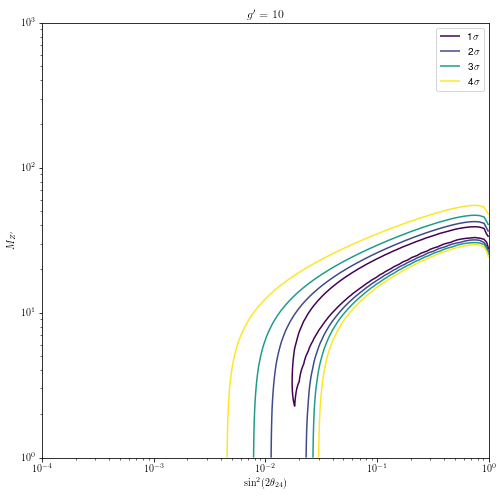

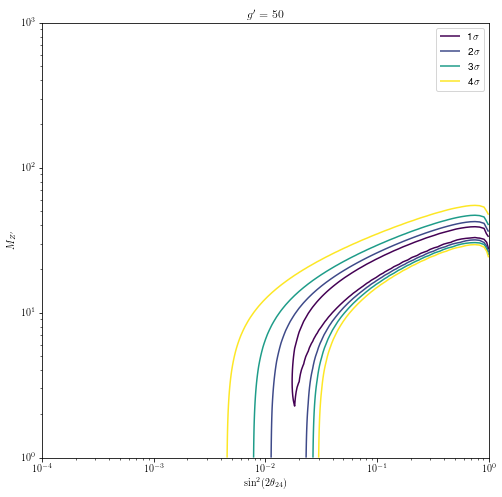

In [69]:
y , x = np.meshgrid(M_Z_array, sin2_theta_24)

for j in range(len(Gp_list)):
    fig, ax = plt.subplots(1,1,figsize = (8,8))
    CS = ax.contour(x, y ,chi_kol[j] - chi_kol[j].min() ,levels =  [3.3,7.18,12.73,20.49]) 
    #plt.clabel(CS, inline=1, fontsize=10)   # this is countor label
    labels = ['1$\sigma$', '2$\sigma$','3$\sigma$','4$\sigma$']
    for i in range(len(labels)):
        ax.collections[i].set_label(labels[i])

    #ax.set_xticklabels([0, .1,.2,.3,.4,.5,.6,.7,.8,.9,.10])
    #ax.scatter(x_min,y_min,marker="o",s=100,c="k")

    ax.legend(loc=0)

    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\sin^2(2\theta_{24})$")
    ax.set_ylabel("$M_{Z'}$")
    
    ax.set_title("$g' = %.f$"%(Gp_list[j]))
    
    plt.savefig("./Output/interactive/Gp_"+str(Gp_list[j])+"_"+parameter_mat+"_"+str(num)+"_"+str(j)+".pdf")